In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter
from scipy import stats

import venn as venn
%matplotlib inline

In [2]:
exs = pd.read_excel('uniprot-filtered-organism__Homo+sapiens+(Human)+(9606)_+AND+review--.xlsx')
exs.index = exs['Entry']
exs = exs.drop(['Entry', 'Entry name', 'Protein names', 'Gene names', 'Status', 'Gene ontology (biological process)', 'Gene ontology (cellular component)', 'Gene ontology (molecular function)'], axis=1)
exs

,Sequence,Gene ontology (GO),Gene ontology IDs
Entry,,,
Q8N7X0,MASKQTKKKEVHRINSAHGSDKSKDFYPFGSNVQSGSTEQKKGKFP...,calcium-dependent cysteine-type endopeptidase ...,GO:0004198; GO:0019825; GO:0020037
Q5T1N1,MDEADFSEHTTYKQEDLPYDGDLSQIKIGNDYSFTSKKDGLEVLNQ...,"DNA-binding transcription activator activity, ...",GO:0000978; GO:0001228; GO:0001837
Q92667,MAIQFRSLFPLALPGMLALLGWWWFFSRKKGHVSSHDEQQVEAGAV...,cytosol [GO:0005829]; integral component of me...,GO:0003723; GO:0005739; GO:0005741; GO:0005829...
Q5VUY0,MWDLALIFLAAACVFSLGVTLWVICSHFFTVHIPAAVGHPVKLRVL...,integral component of membrane [GO:0016021]; c...,GO:0016021; GO:0016787; GO:0052689
P62736,MCEEEDSTALVCDNGSGLCKAGFAGDDAPRAVFPSIVGRPRHQGVM...,actin cytoskeleton [GO:0015629]; cell body [GO...,GO:0005524; GO:0005615; GO:0005737; GO:0005829...
...,...,...,...
Q8N895,MQKEMKMIKDEDVHFDLAVKKTPSFPHCLQPVASRGKAPQRHPFPE...,nucleus [GO:0005634]; DNA binding [GO:0003677]...,GO:0000122; GO:0003677; GO:0003714; GO:0005634...
Q9UK55,MKVVPSLLLSVLLAQVWLVPGLAPSPQSPETPAPQNQTSRVVQAPK...,endoplasmic reticulum lumen [GO:0005788]; extr...,GO:0004867; GO:0005615; GO:0005788; GO:0007596...
Q96MX3,MERAVEPWGPDLHRPEEREPQRGARTGLGSENVISQPNEFEHTPQE...,nucleus [GO:0005634]; DNA binding [GO:0003677]...,GO:0003677; GO:0005634; GO:0042802; GO:0046872


In [4]:
test = pd.read_excel('proteins.xlsx')
test.index = test['Uniprot_ID']
test = test.drop(['Uniprot_ID'], axis = 1)
test

,w2v_LLPS_PDB_RF,Phys_feat_LLPS_PDB_RF,w2v_LLPS_LLPS_RF,Phys_feat_LLPS_LLPS_RF
Uniprot_ID,,,,
O00401,0.990,1.00,0.830,0.80
O14641,0.980,1.00,0.905,0.90
O15116,0.025,0.00,0.230,0.26
O15169,0.915,0.95,0.760,0.69
O15550,0.870,0.90,0.760,0.59
...,...,...,...,...
Q9Y3R0,0.875,0.96,0.790,0.62
Q9Y4Y9,0.040,0.00,0.685,0.22
Q9Y4Z0,0.115,0.72,0.235,0.34


In [5]:
idx1 = test.index.unique()
idx2 = exs.index.unique()
a = idx2.intersection(idx1)

exs =exs.loc[a]
exs

,Sequence,Gene ontology (GO),Gene ontology IDs
Q5TGY3,MRVKPQGLVVTSSAVCSSPDYLREPKYYPGGPPTPRPLLPTRPPAS...,DNA binding [GO:0003677],GO:0003677
Q99700,MRSAAAAPRSPAVATESRRFAAARWPGWRSLQRPARRSGRGGGGAA...,cytoplasm [GO:0005737]; cytoplasmic stress gra...,GO:0002091; GO:0003723; GO:0005154; GO:0005737...
Q96GD4,MAQKENSYPWPYGRQTAPSGLSTLPQRVLRKEPVTPSALVLMSRSN...,chromocenter [GO:0010369]; chromosome passenge...,GO:0000122; GO:0000776; GO:0000779; GO:0000780...
Q9H165,MSRRKQGKPQHLSKREFSPEPLEAILTDDEPDHGPLGAPEGDHDLL...,cytoplasm [GO:0005737]; nucleoplasm [GO:000565...,GO:0000122; GO:0000978; GO:0001227; GO:0003700...
Q6IMN6,MEVQVSQASLGFELTSVEKSLREWSRLSREVIAWLCPSSPNFILNF...,centrosome [GO:0005813]; cytoplasm [GO:0005737...,GO:0003723; GO:0005102; GO:0005654; GO:0005737...
...,...,...,...
Q9BZB8,MALSLEEEAGRIKDCWDNQEAPALSTCSNANIFRRINAILDNSLDF...,centrosome [GO:0005813]; cytoplasm [GO:0005737...,GO:0000900; GO:0000932; GO:0003730; GO:0005634...
Q96LT7,MSTLCPPPSPAVAKTEIALSGKSPLLAATFAYWDNILGPRVRHIWA...,autophagosome [GO:0005776]; axonal growth cone...,GO:0000932; GO:0001933; GO:0005085; GO:0005615...
P38432,MAASETVRLRLQFDYPPPATPHCTAFWLLVDLNRCRVVTDLISLIR...,Cajal body [GO:0015030]; fibrillar center [GO:...,GO:0000387; GO:0001650; GO:0005634; GO:0005654...
P49711,MEGDAVEAIVEESETFIKGKERKTYQRRREGGQEEDACHLPQNQTD...,"chromosome, centromeric region [GO:0000775]; c...",GO:0000122; GO:0000775; GO:0000793; GO:0000976...


In [6]:
exs['Gene ontology IDs']= exs['Gene ontology IDs'].str.split(pat=';', expand = False) 
exs

,Sequence,Gene ontology (GO),Gene ontology IDs
Q5TGY3,MRVKPQGLVVTSSAVCSSPDYLREPKYYPGGPPTPRPLLPTRPPAS...,DNA binding [GO:0003677],[GO:0003677]
Q99700,MRSAAAAPRSPAVATESRRFAAARWPGWRSLQRPARRSGRGGGGAA...,cytoplasm [GO:0005737]; cytoplasmic stress gra...,"[GO:0002091, GO:0003723, GO:0005154, GO:000..."
Q96GD4,MAQKENSYPWPYGRQTAPSGLSTLPQRVLRKEPVTPSALVLMSRSN...,chromocenter [GO:0010369]; chromosome passenge...,"[GO:0000122, GO:0000776, GO:0000779, GO:000..."
Q9H165,MSRRKQGKPQHLSKREFSPEPLEAILTDDEPDHGPLGAPEGDHDLL...,cytoplasm [GO:0005737]; nucleoplasm [GO:000565...,"[GO:0000122, GO:0000978, GO:0001227, GO:000..."
Q6IMN6,MEVQVSQASLGFELTSVEKSLREWSRLSREVIAWLCPSSPNFILNF...,centrosome [GO:0005813]; cytoplasm [GO:0005737...,"[GO:0003723, GO:0005102, GO:0005654, GO:000..."
...,...,...,...
Q9BZB8,MALSLEEEAGRIKDCWDNQEAPALSTCSNANIFRRINAILDNSLDF...,centrosome [GO:0005813]; cytoplasm [GO:0005737...,"[GO:0000900, GO:0000932, GO:0003730, GO:000..."
Q96LT7,MSTLCPPPSPAVAKTEIALSGKSPLLAATFAYWDNILGPRVRHIWA...,autophagosome [GO:0005776]; axonal growth cone...,"[GO:0000932, GO:0001933, GO:0005085, GO:000..."
P38432,MAASETVRLRLQFDYPPPATPHCTAFWLLVDLNRCRVVTDLISLIR...,Cajal body [GO:0015030]; fibrillar center [GO:...,"[GO:0000387, GO:0001650, GO:0005634, GO:000..."
P49711,MEGDAVEAIVEESETFIKGKERKTYQRRREGGQEEDACHLPQNQTD...,"chromosome, centromeric region [GO:0000775]; c...","[GO:0000122, GO:0000775, GO:0000793, GO:000..."


In [7]:
exs['count'] = exs['Gene ontology IDs'].str.len()
exs = exs.sort_values(by=['count'], ascending = False)
exs

,Sequence,Gene ontology (GO),Gene ontology IDs,count
P48436,MNLLDPFMKMTDEQEKGLSGAPSPTMSEDSAGSPCPSGSGSDTENT...,nuclear chromatin [GO:0000790]; nucleoplasm [G...,"[GO:0000122, GO:0000790, GO:0000978, GO:000...",141.0
Q04206,MDELFPLIFPAEPAQASGPYVEIIEQPKQRGMRFRYKCEGRSAGSI...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,"[GO:0000122, GO:0000790, GO:0000976, GO:000...",114.0
P10636,MAEPRQEFEVMEDHAGTYGLGDRKDQGGYTMHQDQEGDTDAGLKES...,axolemma [GO:0030673]; axon [GO:0030424]; axon...,"[GO:0000226, GO:0001774, GO:0003677, GO:000...",105.0
P06241,MGCVQCKDKEATKLTEERDGSLNQSSGYRYGTDPTPQHYPSFGVTS...,actin filament [GO:0005884]; cell body [GO:004...,"[GO:0000165, GO:0000304, GO:0001764, GO:000...",102.0
Q00987,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,cytoplasm [GO:0005737]; cytosol [GO:0005829]; ...,"[GO:0000122, GO:0000209, GO:0001568, GO:000...",93.0
...,...,...,...,...
Q9NTZ6,MAVVIRLQGLPIVAGTMDIRHFFSGLTIPDGGVHIVGGELGEAFIV...,nucleoplasm [GO:0005654]; ribonucleoprotein co...,"[GO:0003723, GO:0005654, GO:0043484, GO:199...",4.0
Q12988,MAKIILRHLIEIPVRYQEEFEARGLEDCRLDHALYALPGPTIVDLR...,cytoplasm [GO:0005737]; nuclear speck [GO:0016...,"[GO:0005634, GO:0005737, GO:0006986, GO:001...",4.0
Q8TC56,MSNESCLPYYTAHSYSSMSAFKTSMGDLQRQLYNRGEYNIFKYAPM...,nucleus [GO:0005634],[GO:0005634],1.0
Q5TGY3,MRVKPQGLVVTSSAVCSSPDYLREPKYYPGGPPTPRPLLPTRPPAS...,DNA binding [GO:0003677],[GO:0003677],1.0


In [29]:
exs=exs.fillna(0)

In [8]:
exs['count'].describe()

count    195.000000
mean      27.871795
std       21.814801
min        1.000000
25%       14.000000
50%       21.000000
75%       33.500000
max      141.000000
Name: count, dtype: float64

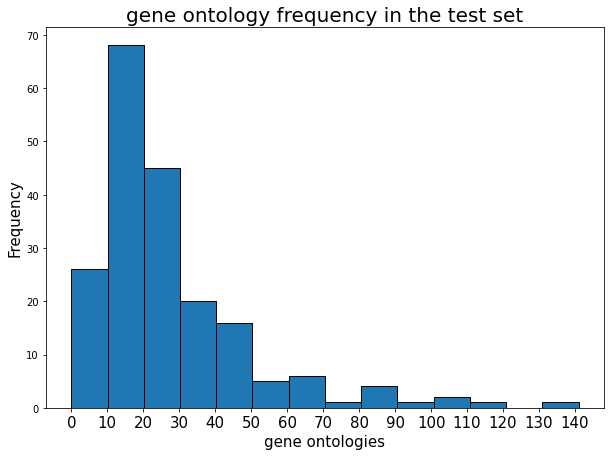

In [32]:
hist = exs.hist(bins=14, column = 'count', xlabelsize = 15, figsize = (10,7), align = 'mid', ec='black', grid=False)

plt.xlabel('gene ontologies',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(np.arange(0, 150, 10))
plt.title('gene ontology frequency in the test set',fontsize=20)
plt.savefig('GO in test set.png', bbox_inches='tight', pad_inches = 0.0)

In [22]:
data = pd.read_excel('uniprot-filtered-organism__Homo+sapiens+(Human)+(9606)_+AND+review--.xlsx')
data.index = data['Entry']
data = data.drop(['Entry', 'Entry name', 'Protein names', 'Gene names', 'Status', 'Gene ontology (biological process)', 'Gene ontology (cellular component)', 'Gene ontology (molecular function)'], axis=1)


In [23]:
data['Gene ontology IDs']= data['Gene ontology IDs'].str.split(pat=';', expand = False)
data['count'] = data['Gene ontology IDs'].str.len()
data = data.sort_values(by=['count'], ascending = False)


In [26]:
data=data.fillna(0)

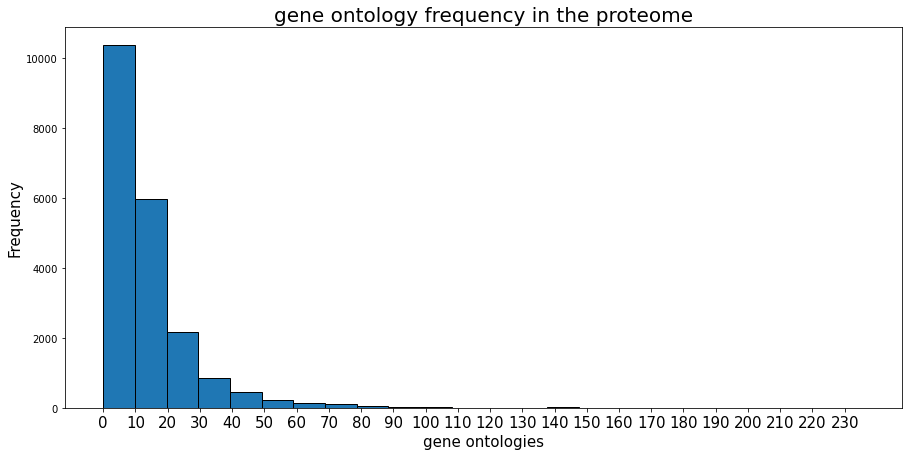

In [27]:
hist1 = data.hist(bins=24, column = 'count', xlabelsize = 15, figsize = (15,7), align = 'mid', ec='black', grid=False)

plt.xlabel('gene ontologies',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(np.arange(0, 240, 10))
plt.title('gene ontology frequency in the proteome',fontsize=20)
plt.savefig('proteome.png', bbox_inches='tight', pad_inches = 0.0)

In [31]:
stats.ttest_ind(data['count'], exs['count'], axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=-9.203516216359187, pvalue=5.1759594030595643e-17)